# Primer Ejemplo con KERAS

Cargamos el conjunto de datos MNIST y lo dividimos en conjuntos de entrenamiento y prueba, con X_train y X_test que contiene las imágenes de entrenamiento y prueba, y_train e y_test contiene el valor real de los dígitos representados en las imágenes. En el conjunto de datos MNIST, se usan 60.000 imágenes para entrenamiento y 10.000 para pruebas/validación.

Primero importamos las librerias a utilizar:

In [53]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

In [50]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Mostramos una de las imágenes con la función plt.imshow y comprobamos su tamaño con la función .shape para comprender cómo se vera el conjunto de datos. 
Como se ve, todas las imágenes MNIST tienen un tamaño uniforme de 28 x 28 píxeles y contienen dígitos escritos a mano.

(28, 28)

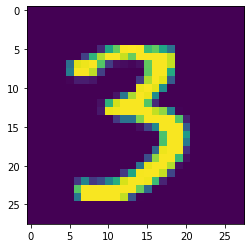

In [52]:
plt.imshow(X_train[10000])
X_train[0].shape

Cambiamos la forma de los dos conjuntos de imágenes X_train y X_test, según la forma esperada por el modelo CNN. 
La función reshape de Keras toma cuatro argumentos: 
    - Número de imágenes de entrenamiento.
    - Tamaño de píxel (m,n) .
    - Profundidad de imagen: usamos 1 para indicar una imagen en escala de grises.

In [21]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

A continuación, generamos un hot encoding de la variable de destino: creamos una columna para cada categoría de clasificación, donde cada columna contiene 0 o 1 que indican si la imagen actual pertenece o no a esa categoría. 
Debido a que estamos clasificando dígitos, habrá 10 columnas para los dígitos del 0 al 9, y de acuerdo con la decisión de clasificación, una de las columnas tendrá un 1 (por ejemplo, la columna para el dígito 3) y el resto será 0.

In [22]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Creamos un modelo, utilizando la clase Sequential , que nos permite construir un modelo agregando una capa a la vez.

In [54]:
model = Sequential()

Agregamos capas de modelo: las dos primeras capas son Conv2D que son capas convolucionales bidimensionales. Estas son capas de convolución que tratan con las imágenes de entrada, que se ven como matrices bidimensionales. La función Conv2D toma cuatro parámetros:

    - Número de neuronas en cada capa. Usaremos 64 para la primera capa convolucional y 32 para la segunda.
    - kernel_size: Define el tamaño del filtro: es el área en píxeles cuadrados que el modelo usará para "escanear" la imagen. El tamaño de kernel de 3 significa que el modelo utilizara un cuadrado de 3 × 3 píxeles a la vez.
    - activación: Es el tipo de función de activación que usamos después de cada capa convolucional. Para CNN, la función de activación típica utilizada es ReLu.
    - input_shape: Es el tamaño de píxel de las imágenes y la profundidad de la imagen, nuevamente configurando 1 para escala de grises.

In [24]:
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))

Agregue una capa 'Flatten', que toma la salida de las dos capas de convolución y la convierte en un formato que puede ser utilizado por la capa neural final, totalmente conectada.

In [25]:
model.add(Flatten())

Agregue la capa final de la red neuronal del tipo 'Dense', una capa neural totalmente conectada que generará la predicción final. La función Densa toma dos argumentos:

    - Número de nodos de salida: 10 en nuestro caso porque necesitamos generar predicciones para dígitos entre 0-9.
    - Tipo de función de activación para la capa de salida. Usamos softmax que es la función de activación típica utilizada para las capas de salida de la red neural. Softmax toma la salida de la capa densa y la convierte en probabilidades significativas para cada uno de los dígitos, que suman 1. 

In [26]:
model.add(Dense(10, activation='softmax'))

Compilamos el modelo. La funcion 'Compile' toma tres parámetros:
    - optimizer: Controla la tasa de aprendizaje, que define qué tan rápido se calculan los pesos óptimos para el modelo. Utilizaremos el optimizador de velocidad de aprendizaje llamado 'adam'.
    - loss: Define la función de pérdida, que mide qué tan lejos está la predicción del modelo del valor real de los dígitos para las imágenes. Utilizaremos 'categorical_crossentropy', una función de pérdida adecuada para problemas de clasificación.
    - metrics: Define cómo evaluamos el éxito del modelo. Utilizaremos la métrica de 'precisión' para calcular un puntaje de precisión en el conjunto de imágenes de prueba/validación.

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Entrenando el modelo, usando la función fit consta de cuatro parámetros:
    - datos de entrenamiento (train_X)  
    - datos de destino (train_y)
    - datos de validación
    - número de épocas (número de veces que se ejecutará el proceso de propagación hacia atrás en las imágenes de entrenamiento) lo configuraremos en 3.

In [28]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 67s 1ms/step - loss: 0.2188 - accuracy: 0.9507 - val_loss: 0.1054 - val_accuracy: 0.9709
Epoch 2/3
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0679 - accuracy: 0.9790 - val_loss: 0.0869 - val_accuracy: 0.9761
Epoch 3/3
60000/60000 [==============================] - 66s 1ms/step - loss: 0.0456 - accuracy: 0.9859 - val_loss: 0.1029 - val_accuracy: 0.9710


Como se puede ver arriba, después de tres épocas, la precisión en el conjunto de validación es de 97.61%. La CNN funciona bien.

Ahora que el modelo está funcionando, podemos generar predicciones reales utilizando la función _PREDICT_. 
La función devuelve una matriz de probabilidades para cada uno de los 10 resultados posibles (dígitos entre 0-9), con la suma de probabilidades para cada imagen igual a 1. 
Podemos ingresar datos nuevos y desconocidos a la función de predicción para obtener la predicción de nuestro modelo. Por ahora, vamos a hacer una predicción para las primeras cuatro imágenes en el conjunto de prueba:

In [39]:
def predictions_nums(predict):
    for elem in predict:
        print(np.where(elem == np.amax(elem))[0][0])
        
def comparate_prediction(predict, realValues):
    for index in range(0, len(predict)):
        print(f"Model predict: {np.where(predict[index] == np.amax(predict[index]))[0][0]} - Real num: {np.where(realValues[index] == np.amax(realValues[index]))[0][0]}")
    

In [38]:
predict = model.predict(X_test[:4])

predictions_nums(predict)

7
2
1
0


La salida mostrará probabilidades para los dígitos 0-9, para cada una de las 4 imágenes. El modelo predice 7, 2, 1 y 0 para las primeras cuatro imágenes.

Comparamos esto con los resultados reales de las primeras 4 imágenes en el conjunto de prueba:

In [41]:
comparate_prediction(predict, y_test[:4])

Model predict: 7 - Real num: 7
Model predict: 2 - Real num: 2
Model predict: 1 - Real num: 1
Model predict: 0 - Real num: 0


La salida muestra que los valores reales para las primeras cuatro imágenes también es 7, 2,1 y 0, por lo tanto, el modelo hizo una predicción precisa.